In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

In [2]:
# User inputs
file_dir  = '/Users/rmueller/Data/MIDOSS/DeptOfEcology/'
file_name = 'MuellerTrans4-30-20.xlsx'

In [3]:
# Import columns are: (E) 'StartDateTime, (G) Deliverer, (H) Receiver, (P) Product, 
#                     (Q) Quantity in Gallons, (R) Transfer Type (Fueling, Cargo, or Other)', 
#                     (w) DelivererTypeDescription, (x) ReceiverTypeDescription 
df = pd.read_excel(f'{file_dir}{file_name}',sheet_name='Vessel Oil Transfer', 
                   usecols="E,G,H,P,Q,R,W,X")



### Extract data for oil cargo transferred to vessels for marine export approximation

In [4]:
# Get all cargo fuel transfers
cargo_data = df[df['TransferType']=='Cargo']
cargo_net_out = cargo_data[cargo_data['DelivererTypeDescription']=='Facility']
cargo_net_in = cargo_data[cargo_data['ReceiverTypeDescription']=='Facility']

In [5]:
# plot up net marine transport
crude_data = cargo_data[cargo_data['Product']=='CRUDE OIL']
bunker_data = cargo_data[cargo_data['Product']=='BUNKER OIL/HFO']
gas_data = cargo_data[cargo_data['Product']=='GASOLINE']
diesel_data = cargo_data[cargo_data['Product'].isin(['DIESEL/MARINE GAS OIL', 'BIODIESEL', 'DIESEL LOW SULPHUR (ULSD)'])]
jet_data = cargo_data[cargo_data['Product']=='JET FUEL/KEROSENE']
other_data = cargo_data[~cargo_data['Product'].isin(
    ['DIESEL/MARINE GAS OIL', 'BIODIESEL', 'DIESEL LOW SULPHUR (ULSD)',
    'CRUDE OIL','BUNKER OIL/HFO','GASOLINE','JET'])]
plot_net = [gas_data['TransferQtyInGallon'].sum(), 
                     diesel_data['TransferQtyInGallon'].sum() , 
                     bunker_data['TransferQtyInGallon'].sum(), 
                     jet_data['TransferQtyInGallon'].sum(), 
                     crude_data['TransferQtyInGallon'].sum(), 
                     other_data['TransferQtyInGallon'].sum()]


In [6]:
# plot up marine export
plot_data = cargo_net_out

crude_data = plot_data[plot_data['Product']=='CRUDE OIL']
bunker_data = plot_data[plot_data['Product']=='BUNKER OIL/HFO']
gas_data = plot_data[plot_data['Product']=='GASOLINE']
diesel_data = plot_data[plot_data['Product'].isin(['DIESEL/MARINE GAS OIL', 'BIODIESEL', 'DIESEL LOW SULPHUR (ULSD)'])]
jet_data = plot_data[plot_data['Product']=='JET FUEL/KEROSENE']
other_data = plot_data[~plot_data['Product'].isin(
    ['DIESEL/MARINE GAS OIL', 'BIODIESEL', 'DIESEL LOW SULPHUR (ULSD)',
    'CRUDE OIL','BUNKER OIL/HFO','GASOLINE','JET'])]
plot_out = [gas_data['TransferQtyInGallon'].sum(), 
                     diesel_data['TransferQtyInGallon'].sum() , 
                     bunker_data['TransferQtyInGallon'].sum(), 
                     jet_data['TransferQtyInGallon'].sum(), 
                     crude_data['TransferQtyInGallon'].sum(), 
                     other_data['TransferQtyInGallon'].sum()]

In [7]:
# plot up marine import
plot_data = cargo_net_in

crude_data = plot_data[plot_data['Product']=='CRUDE OIL']
bunker_data = plot_data[plot_data['Product']=='BUNKER OIL/HFO']
gas_data = plot_data[plot_data['Product']=='GASOLINE']
diesel_data = plot_data[plot_data['Product'].isin(['DIESEL/MARINE GAS OIL', 'BIODIESEL', 'DIESEL LOW SULPHUR (ULSD)'])]
jet_data = plot_data[plot_data['Product']=='JET FUEL/KEROSENE']
other_data = plot_data[~plot_data['Product'].isin(
    ['DIESEL/MARINE GAS OIL', 'BIODIESEL', 'DIESEL LOW SULPHUR (ULSD)',
    'CRUDE OIL','BUNKER OIL/HFO','GASOLINE','JET'])]
plot_in = [gas_data['TransferQtyInGallon'].sum(), 
                     diesel_data['TransferQtyInGallon'].sum() , 
                     bunker_data['TransferQtyInGallon'].sum(), 
                     jet_data['TransferQtyInGallon'].sum(), 
                     crude_data['TransferQtyInGallon'].sum(), 
                     other_data['TransferQtyInGallon'].sum()]

In [8]:
plot_data = cargo_net_in
plot_data[-1:]

,StartDateTime,Deliverer,Receiver,Product,TransferQtyInGallon,TransferType,DelivererTypeDescription,ReceiverTypeDescription
14697,2018-12-31 10:00:00,OVERSEAS LOS ANGELES,BP Cherry Point Refinery,JET FUEL/KEROSENE,1218000,Cargo,TANK SHIP,Facility


#### By vessel type

In [32]:
#IMPORTS
plot_data = cargo_net_in
plot_data.reset_index( drop=True, inplace=True)
[rows,cols] = plot_data.shape

atb_in    = pd.DataFrame(columns = cargo_data.columns)
tanker_in = pd.DataFrame(columns = cargo_data.columns)
tug_in    = pd.DataFrame(columns = cargo_data.columns)

for row in range(rows):
# Tankers
    if plot_data.DelivererTypeDescription[row] == 'TANK SHIP':
        tanker_in = tanker_in.append( plot_data.iloc[row] )

# ATBs
    elif ( plot_data.DelivererTypeDescription[row] == 'TANK BARGE' and 
          'ATB' in plot_data.Deliverer[row] or 
          'ITB' in plot_data.Deliverer[row] ):
         atb_in = atb_in.append( plot_data.iloc[row] )
            
# Tank-barges
    elif ( plot_data.DelivererTypeDescription[row] == 'TANK BARGE' or 
           plot_data.DelivererTypeDescription[row] == 'TUGBOAT' and 
          'ATB' not in plot_data.Deliverer[row] and 
          'ITB' not in plot_data.Deliverer[row] ):
        tug_in = tug_in.append( plot_data.iloc[row] )

# reset indexing        
atb_in.reset_index( drop=True, inplace=True )
tanker_in.reset_index( drop=True, inplace=True )
tug_in.reset_index( drop=True, inplace=True )

# EXPORTS
plot_data = cargo_net_out
plot_data.reset_index( drop=True, inplace=True)
[rows,cols] = plot_data.shape

atb_out    = pd.DataFrame(columns = cargo_data.columns)
tanker_out = pd.DataFrame(columns = cargo_data.columns)
tug_out    = pd.DataFrame(columns = cargo_data.columns)

for row in range(rows):
# Tankers
    if plot_data.ReceiverTypeDescription[row] == 'TANK SHIP':
        tanker_out = tanker_out.append( plot_data.iloc[row] )

# ATBs
    elif ( plot_data.ReceiverTypeDescription[row] == 'TANK BARGE' and 
          'ATB' in plot_data.Receiver[row] or 
          'ITB' in plot_data.Receiver[row] ):
         atb_out = atb_out.append( plot_data.iloc[row] )
            
# Tank-barges
    elif ( plot_data.ReceiverTypeDescription[row] == 'TANK BARGE' or 
           plot_data.ReceiverTypeDescription[row] == 'TUGBOAT' and 
          'ATB' not in plot_data.Receiver[row] and 
          'ITB' not in plot_data.Receiver[row] ):
        tug_out = tug_out.append( plot_data.iloc[row] )

# reset indexing        
atb_out.reset_index( drop=True, inplace=True )
tanker_out.reset_index( drop=True, inplace=True )
tug_out.reset_index( drop=True, inplace=True )


##### divide into oil type by transport method

In [33]:
def fuel_apportion(plot_data): 
    crude_data = plot_data[plot_data['Product']=='CRUDE OIL']
    bunker_data = plot_data[plot_data['Product']=='BUNKER OIL/HFO']
    gas_data = plot_data[plot_data['Product']=='GASOLINE']
    diesel_data = plot_data[plot_data['Product'].isin(['DIESEL/MARINE GAS OIL', 'BIODIESEL', 'DIESEL LOW SULPHUR (ULSD)'])]
    jet_data = plot_data[plot_data['Product']=='JET FUEL/KEROSENE']
    other_data = plot_data[~plot_data['Product'].isin(
        ['DIESEL/MARINE GAS OIL', 'BIODIESEL', 'DIESEL LOW SULPHUR (ULSD)',
        'CRUDE OIL','BUNKER OIL/HFO','GASOLINE','JET'])]
    fuel_data = [gas_data['TransferQtyInGallon'].sum(), 
                         diesel_data['TransferQtyInGallon'].sum() , 
                         bunker_data['TransferQtyInGallon'].sum(), 
                         jet_data['TransferQtyInGallon'].sum(), 
                         crude_data['TransferQtyInGallon'].sum(), 
                         other_data['TransferQtyInGallon'].sum()]
    return fuel_data

In [34]:
plot_atb_in = fuel_apportion(atb_in)
plot_tanker_in = fuel_apportion(tanker_in)
plot_tug_in = fuel_apportion(tug_in)

plot_atb_out = fuel_apportion(atb_out)
plot_tanker_out = fuel_apportion(tanker_out)
plot_tug_out = fuel_apportion(tug_out)

In [44]:
all_in  = cargo_net_in['TransferQtyInGallon'].sum()
all_out = cargo_net_out['TransferQtyInGallon'].sum()

atb_in_percent = atb_in['TransferQtyInGallon'].sum()/all_in
tanker_in_percent = tanker_in['TransferQtyInGallon'].sum()/all_in
tug_in_percent = tug_in['TransferQtyInGallon'].sum()/all_in

atb_out_percent = atb_out['TransferQtyInGallon'].sum()/all_out
tanker_out_percent = tanker_out['TransferQtyInGallon'].sum()/all_out
tug_out_percent = tug_out['TransferQtyInGallon'].sum()/all_out

#### Plot volume marine transport by fuel type

Text(0.5,1,'Export')

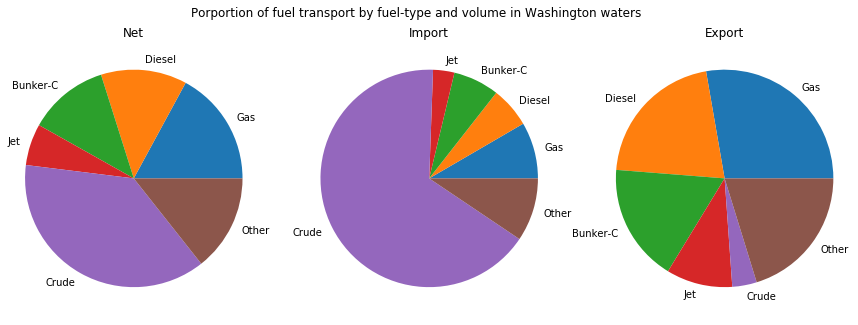

In [35]:
labels = ['Gas', 
          'Diesel', 
          'Bunker-C', 
          'Jet', 
          'Crude', 
          'Other']

fig, axes = plt.subplots(1, 3, figsize = (15,5))
fig.suptitle('Porportion of fuel transport by fuel-type and volume in Washington waters')

#net
axes[0].axis("equal")
axes[0].pie(plot_net, labels= labels)
axes[0].set_title('Net')

#imports
axes[1].axis("equal")
axes[1].pie(plot_in, labels= labels)
plot_title = 'Import'
axes[1].set_title(plot_title)

#exports
axes[2].axis("equal")
axes[2].pie(plot_out, labels= labels)
plot_title = 'Export'
axes[2].set_title(plot_title)

#### Plot volume transport by vessel type

Text(0.5,1,'Tug(14.46%)')

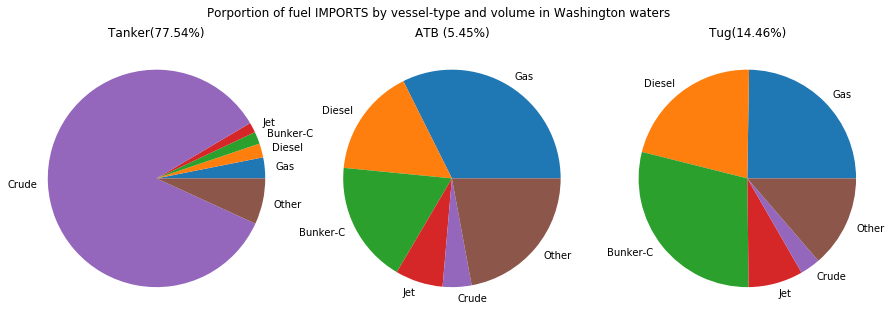

In [51]:
# IMPORTS

fig, axes = plt.subplots(1, 3, figsize = (15,5))
fig.suptitle('Porportion of fuel IMPORTS by vessel-type and volume in Washington waters')

#net
axes[0].axis("equal")
axes[0].pie(plot_tanker_in, labels= labels)
axes[0].set_title(f'Tanker({100*tanker_in_percent:4.2f}%)')

#imports
axes[1].axis("equal")
axes[1].pie(plot_atb_in, labels= labels)
plot_title = f'ATB ({100*atb_in_percent:4.2f}%)'
axes[1].set_title(plot_title)

#exports
axes[2].axis("equal")
axes[2].pie(plot_tug_in, labels= labels)
plot_title = f'Tug({100*tug_in_percent:4.2f}%)'
axes[2].set_title(plot_title)

Text(0.5,1,'Tug(30.17%)')

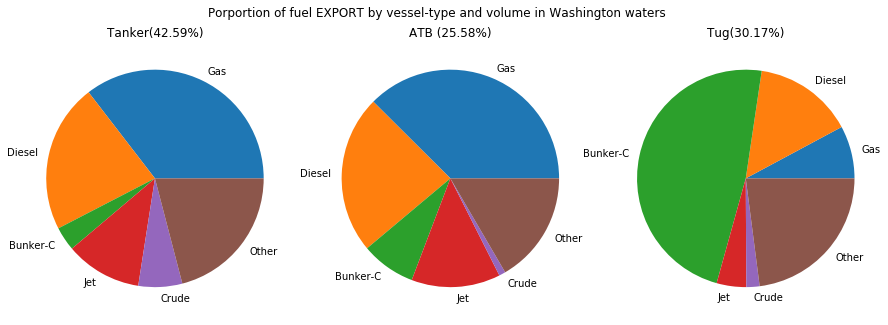

In [48]:
# EXPORTS

fig, axes = plt.subplots(1, 3, figsize = (15,5))
fig.suptitle('Porportion of fuel EXPORT by vessel-type and volume in Washington waters')

#net
axes[0].axis("equal")
axes[0].pie(plot_tanker_out, labels= labels)
axes[0].set_title(f'Tanker({100*tanker_out_percent:4.2f}%)')

#imports
axes[1].axis("equal")
axes[1].pie(plot_atb_out, labels= labels)
plot_title = f'ATB ({100*atb_out_percent:4.2f}%)'
axes[1].set_title(plot_title)

#exports
axes[2].axis("equal")
axes[2].pie(plot_tug_out, labels= labels)
plot_title = f'Tug({100*tug_out_percent:4.2f}%)'
axes[2].set_title(plot_title)

In [50]:
atb_in_crude = atb_in[atb_in['Product']=='CRUDE OIL']
atb_in_crude

,StartDateTime,Deliverer,Receiver,Product,TransferQtyInGallon,TransferType,DelivererTypeDescription,ReceiverTypeDescription
43,2018-05-06 01:00:00,ATB BARGE KIRBY 185-01,Shell Puget Sound Refinery,CRUDE OIL,4200000,Cargo,TANK BARGE,Facility
59,2018-06-15 09:00:00,ATB BARGE ALL ABOARD FOR A CURE,Phillips 66 Ferndale Refinery,CRUDE OIL,3360000,Cargo,TANK BARGE,Facility
71,2018-07-13 23:00:00,ATB BARGE KIRBY 185-01,Shell Puget Sound Refinery,CRUDE OIL,6812610,Cargo,TANK BARGE,Facility


In [42]:
tug_in_crude = tug_in[tug_in['Product']=='CRUDE OIL']
tug_in_crude

,StartDateTime,Deliverer,Receiver,Product,TransferQtyInGallon,TransferType,DelivererTypeDescription,ReceiverTypeDescription
33,2018-01-17 23:00:00,DRAKES BAY,U.S. Oil & Refining,CRUDE OIL,3255000,Cargo,TANK BARGE,Facility
114,2018-02-21 18:00:00,DRAKES BAY,U.S. Oil & Refining,CRUDE OIL,2940000,Cargo,TANK BARGE,Facility
270,2018-04-27 18:00:00,DRAKES BAY,U.S. Oil & Refining,CRUDE OIL,3360000,Cargo,TANK BARGE,Facility
341,2018-05-25 19:00:00,DRAKES BAY,U.S. Oil & Refining,CRUDE OIL,3570000,Cargo,TANK BARGE,Facility
468,2018-07-10 19:00:00,DRAKES BAY,U.S. Oil & Refining,CRUDE OIL,3570000,Cargo,TANK BARGE,Facility
570,2018-08-14 07:00:00,DRAKES BAY,U.S. Oil & Refining,CRUDE OIL,3255000,Cargo,TANK BARGE,Facility
732,2018-10-11 03:00:00,DRAKES BAY,BP Cherry Point Refinery,CRUDE OIL,3570000,Cargo,TANK BARGE,Facility
748,2018-10-21 01:00:00,DRAKES BAY,Phillips 66 Ferndale Refinery,CRUDE OIL,3570000,Cargo,TANK BARGE,Facility
